In [1]:
import os
import torch
import warnings
warnings.filterwarnings('ignore')

import GCAST
os.environ["R_HOME"] = "/public/home/ljquan/anaconda3/envs/myx/lib/R"
random_seed = 2025
device = "cuda" if torch.cuda.is_available() else "cpu"
packnames = ('mclust',)


# os.chdir(r"C:\Users\24112\Desktop\item\test")
# print("loading path...", os.getcwd())


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [ ]:
## Extract embedding for Cross-Platform integration of v10x Mouse Anterior and Mouse Posterior 

In [2]:
data_root = "../Dataset/Mouse"
sample_name = [
    "Mouse_Adult_Olfactory_Bulb_10x",
    "Mouse_Olfactory_Stereo-seq"
]
file_name = [
    "filtered_feature_bc_matrix.h5", 
    "filtered_feature_bc_matrix.h5ad"
]

tech_lst = ["v10x", "Stereo-seq" ]
Hist = [ True, False]
subsample = [1, 0.5]

n_clusters=7
negi = 12

In [3]:
GCAST.set_seed(random_seed)
adata, graph_dict = GCAST.LoadCrossST(data_root, sample_name, file_name, n_clusters,tech_lst,subsample, Hist, n_top_genes=6000).data()
net = GCAST.GCAST(adata.obsm["X_pca"], graph_dict, device=device, model_name=f"CrossPlatform")

100%|██████████| 2/2 [00:51<00:00, 25.52s/it]


In [4]:
net.train_with_dec()

 17%|█▋        | 174/1000 [01:04<05:07,  2.68it/s]


In [5]:
net.load_model()
feat, _, _ = net.eval_model()
adata.obsm["emb"] = feat


In [6]:
adata = GCAST.hm_integration(adata, harmony_key='emb' )

2025-10-23 12:14:26,959 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-10-23 12:14:30,228 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-10-23 12:14:30,262 - harmonypy - INFO - Iteration 1 of 10
2025-10-23 12:14:32,127 - harmonypy - INFO - Iteration 2 of 10
2025-10-23 12:14:34,136 - harmonypy - INFO - Iteration 3 of 10
2025-10-23 12:14:36,068 - harmonypy - INFO - Iteration 4 of 10
2025-10-23 12:14:37,517 - harmonypy - INFO - Iteration 5 of 10
2025-10-23 12:14:38,700 - harmonypy - INFO - Iteration 6 of 10
2025-10-23 12:14:39,801 - harmonypy - INFO - Iteration 7 of 10
2025-10-23 12:14:40,798 - harmonypy - INFO - Iteration 8 of 10
2025-10-23 12:14:41,839 - harmonypy - INFO - Iteration 9 of 10
2025-10-23 12:14:43,840 - harmonypy - INFO - Iteration 10 of 10
2025-10-23 12:14:44,863 - harmonypy - INFO - Stopped before convergence


In [11]:
GCAST.KMeans_Cluster(adata, n_clusters=n_clusters)

adata_1 = adata[adata.obs["batch"]=="0"]
adata_2 = adata[adata.obs["batch"]=="1"]
cluster_1 = GCAST.eval_cluster_number(adata_1, 7, ["KMeans"] )
cluster_2 = GCAST.eval_cluster_number(adata_2, 7, ["KMeans"] )

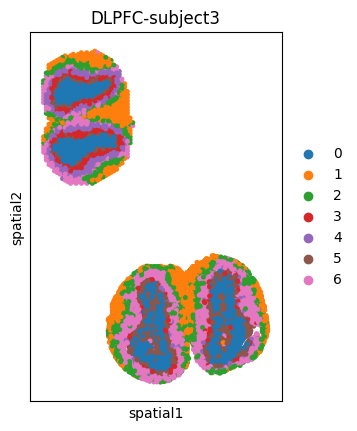

In [12]:
# GCAST.plot_spatial(adata, color="KMeans", title="Mouse-CrossPlatform",  save=False, show=True)

## Align the spatial position coordinates of two different sequencing technology  for visualization

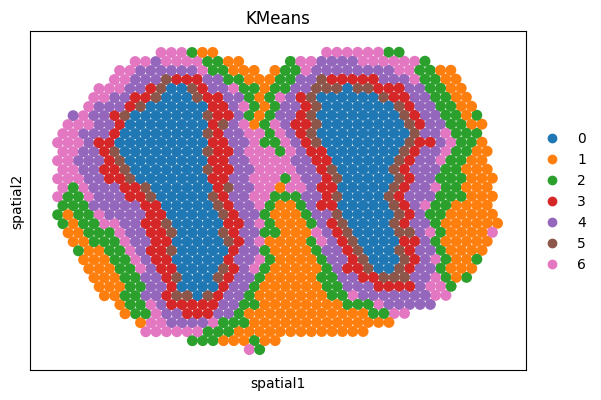

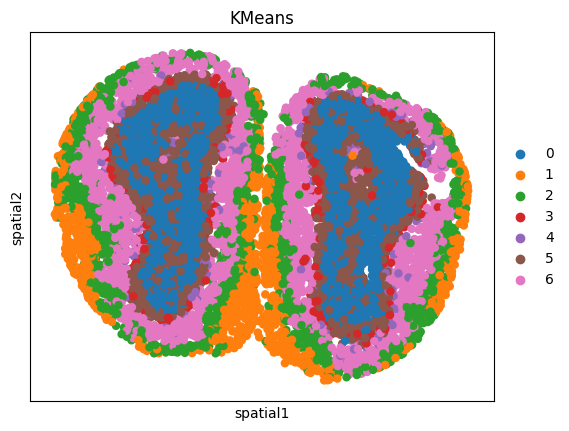

In [19]:
import anndata
import scanpy as sc 
import matplotlib.pyplot as plt
adata_processed = anndata.read_h5ad("../Tutorial/adata_crossplafform.h5ad")                                
batch_names = adata_processed.obs['batch_name'].unique()

for batch in batch_names:
    adata_batch = adata_processed[adata_processed.obs['batch_name'] == batch]
    if batch == "Mouse_Adult_Olfactory_Bulb_10x":
        batch_name = "Mouse Adult Olfactory(10x Visium)"
    elif batch == "Mouse_Olfactory_Stereo-seq":
        batch_name = "Mouse Adult Olfactory(Stereo-seq)"
    fig = sc.pl.spatial(
        adata_batch,
        color='KMeans',
        spot_size=120,
        return_fig=True  # 返回matplotlib的fig对象
    )
    # 设置标题字体大小
    fig.axes[0].set_title(f'{ batch} ', fontsize=20)


    plt.show()
    plt.close(fig)